In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("restaurant_orders_final.csv")
print(" First 5 rows of the data:")
print(df.head())
print("\n Dataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe(include='all'))


 First 5 rows of the data:
   order_id customer_id        item_name item_type portion_size  item_price  \
0     10001      C10872      Egg Noodles   Non-Veg         half         100   
1     10001      C10872  Chicken Biryani   Non-Veg         full         220   
2     10001      C10872  Chicken Biryani   Non-Veg         full         220   
3     10002      C10872      Butter Naan       Veg          NaN          40   
4     10003      C10435  Chicken Noodles   Non-Veg         half         110   

   item_qty  transaction_amt transaction_type      time        date  \
0         1              100          Digital  21:00:00  2024-09-06   
1         1              220             Cash  21:00:00  2024-09-06   
2         1              220          Digital  21:00:00  2024-09-06   
3         1               40          Digital  12:30:00  2024-09-06   
4         1              110          Digital  13:15:00  2024-09-06   

  customer_type        customer_location  distance_km discount  \
0    

### Top 10 Most Ordered Items

C:\Users\ETERNAL NOSTALGIA\AppData\Local\Temp\ipykernel_11636\1532844098.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_items.index, y=top_items.values , palette="viridis")


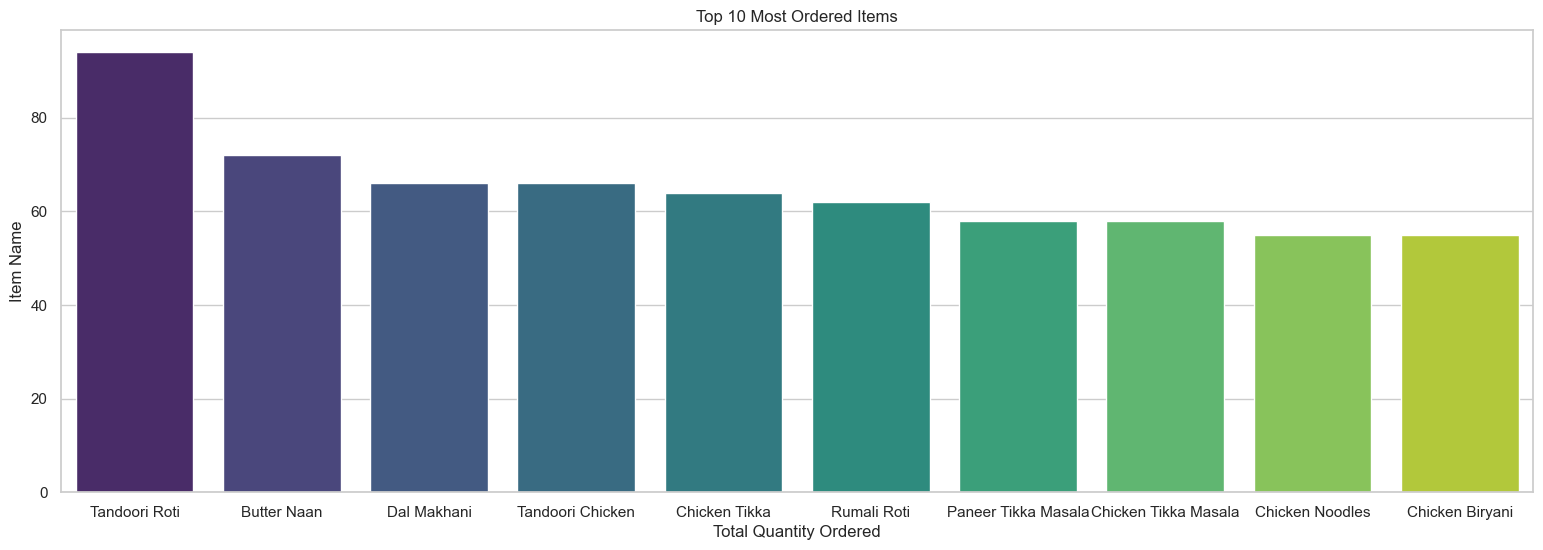

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


sns.set(style="whitegrid")


top_items = df.groupby('item_name')['item_qty'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(19, 6))
sns.barplot(x=top_items.index, y=top_items.values , palette="viridis")
plt.title('Top 10 Most Ordered Items')
plt.xlabel('Total Quantity Ordered')
plt.ylabel('Item Name')
plt.show()


### Busiest Order Times By Day of Week

C:\Users\ETERNAL NOSTALGIA\AppData\Local\Temp\ipykernel_11636\1252107588.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=order_by_day.index, y=order_by_day.values, palette='Set2')


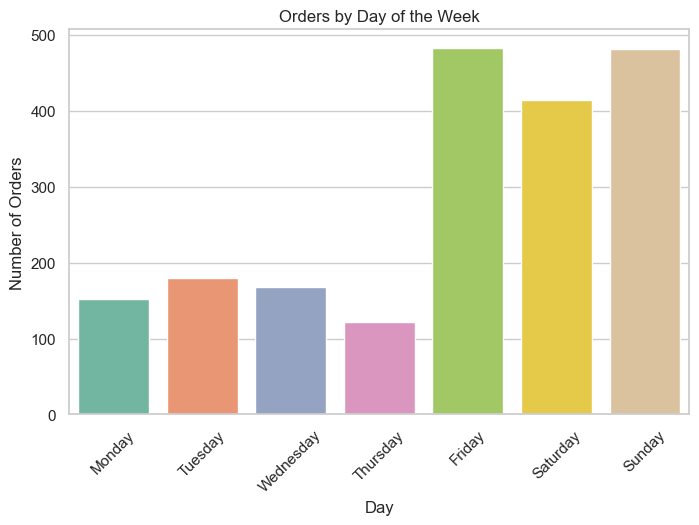

In [3]:
plt.figure(figsize=(8, 5))
order_by_day = df['weekday'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

sns.barplot(x=order_by_day.index, y=order_by_day.values, palette='Set2')
plt.title('Orders by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()


### Channel Breakdown (Online vs Offline)

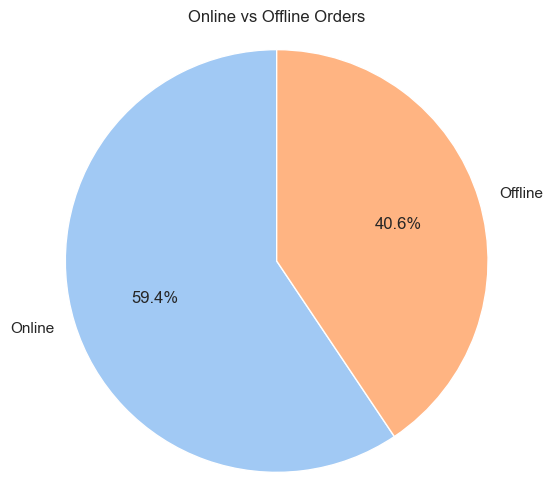

In [4]:
plt.figure(figsize=(6, 6))
channel_counts = df['customer_type'].value_counts()

plt.pie(channel_counts, labels=channel_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Online vs Offline Orders')
plt.axis('equal')
plt.show()


### Total Revenue by Item Type


C:\Users\ETERNAL NOSTALGIA\AppData\Local\Temp\ipykernel_11636\1344514336.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_type.index, y=revenue_by_type.values , palette='viridis')


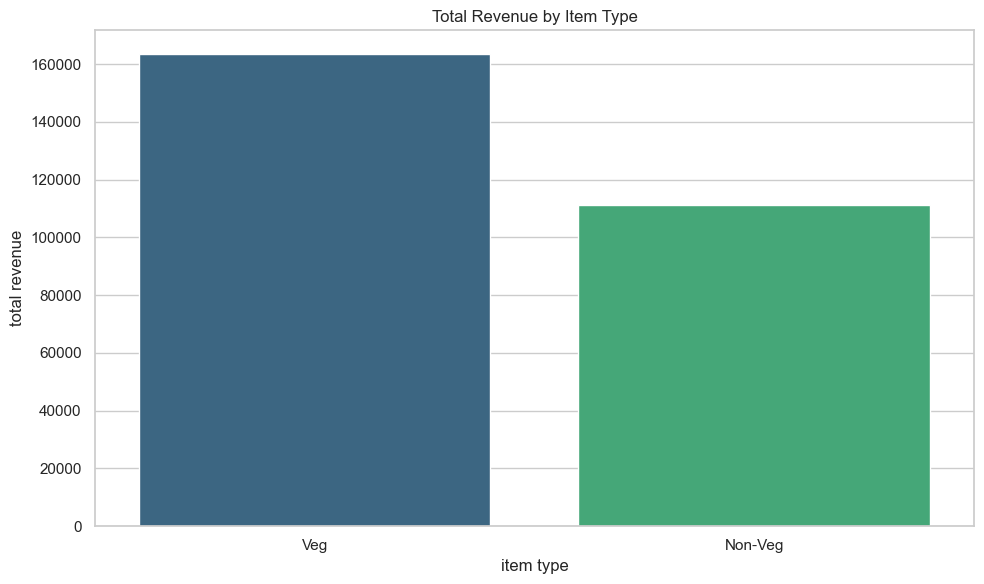

In [5]:
revenue_by_type = df.groupby('item_type')['transaction_amt'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=revenue_by_type.index, y=revenue_by_type.values , palette='viridis')
plt.title('Total Revenue by Item Type')
plt.xlabel('item type')
plt.ylabel('total revenue')
plt.tight_layout()
plt.show()


###  Sales Distribution by Customer Location

C:\Users\ETERNAL NOSTALGIA\AppData\Local\Temp\ipykernel_11636\1701298408.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_sales.index, y=location_sales.values, palette='coolwarm')


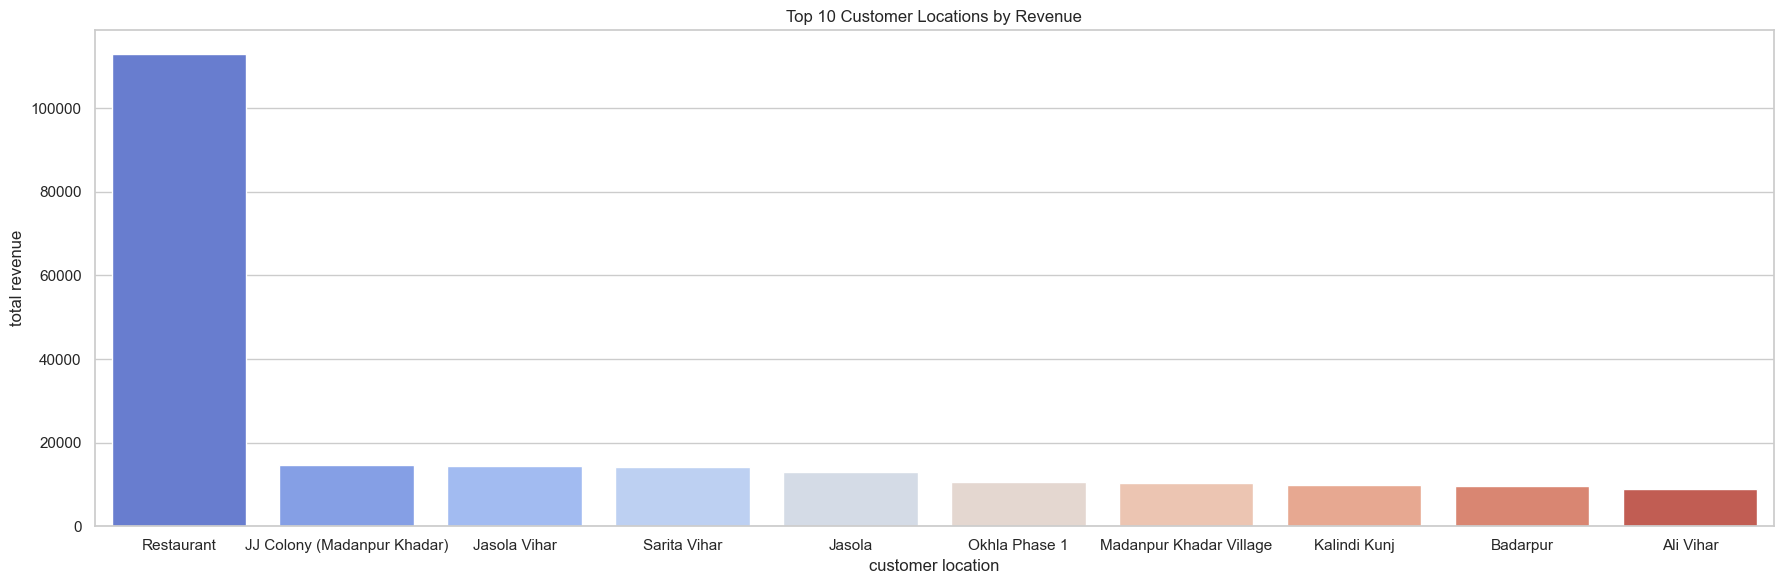

In [6]:
location_sales = df.groupby('customer_location')['transaction_amt'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(18,6))
sns.barplot(x=location_sales.index, y=location_sales.values, palette='coolwarm')
plt.title('Top 10 Customer Locations by Revenue')
plt.xlabel('customer location')
plt.ylabel('total revenue')
plt.tight_layout()
plt.show()


### Sales Trend by Weekday

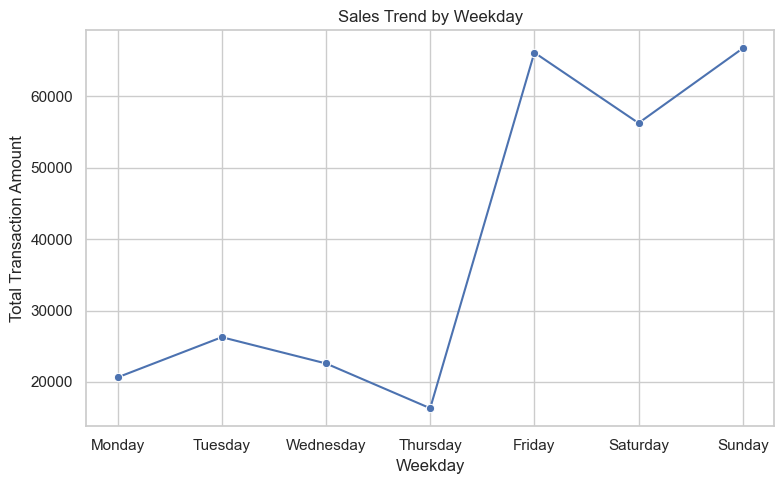

In [7]:
weekday_sales = df.groupby('weekday')['transaction_amt'].sum()
weekday_sales = weekday_sales.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(8,5))
sns.lineplot(x=weekday_sales.index, y=weekday_sales.values, marker='o')
plt.title('Sales Trend by Weekday')
plt.ylabel('Total Transaction Amount')
plt.xlabel('Weekday')
plt.tight_layout()
plt.show()


### Customer retention

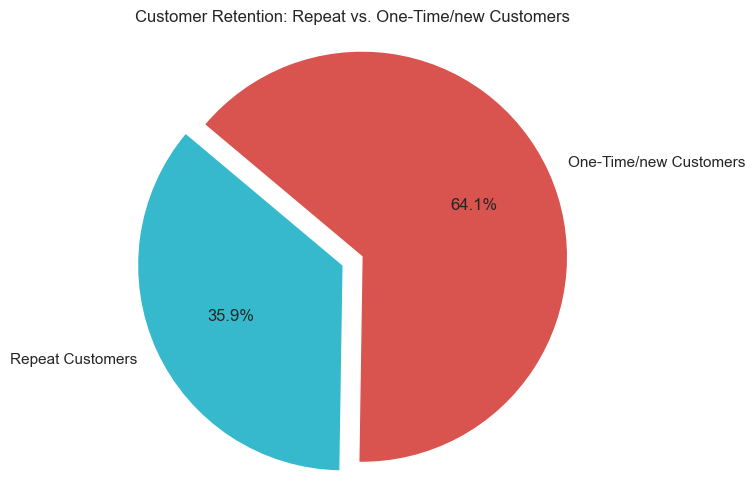

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('restaurant_orders_final.csv')


customer_orders = df.groupby('customer_id')['order_id'].nunique()


total_customers = len(customer_orders)
repeat_customers = (customer_orders > 1).sum()
one_time_customers = total_customers - repeat_customers
repeat_rate = (repeat_customers / total_customers * 100) if total_customers > 0 else 0


labels = ['Repeat Customers', 'One-Time/new Customers']
sizes = [repeat_customers, one_time_customers]
colors = ['#36b9cc', '#d9534f']
explode = (0.1, 0)  

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Customer Retention: Repeat vs. One-Time/new Customers')
plt.axis('equal')
plt.savefig('customer_retention_pie.png')
plt.show()


### Cancellation rate by discount and distance

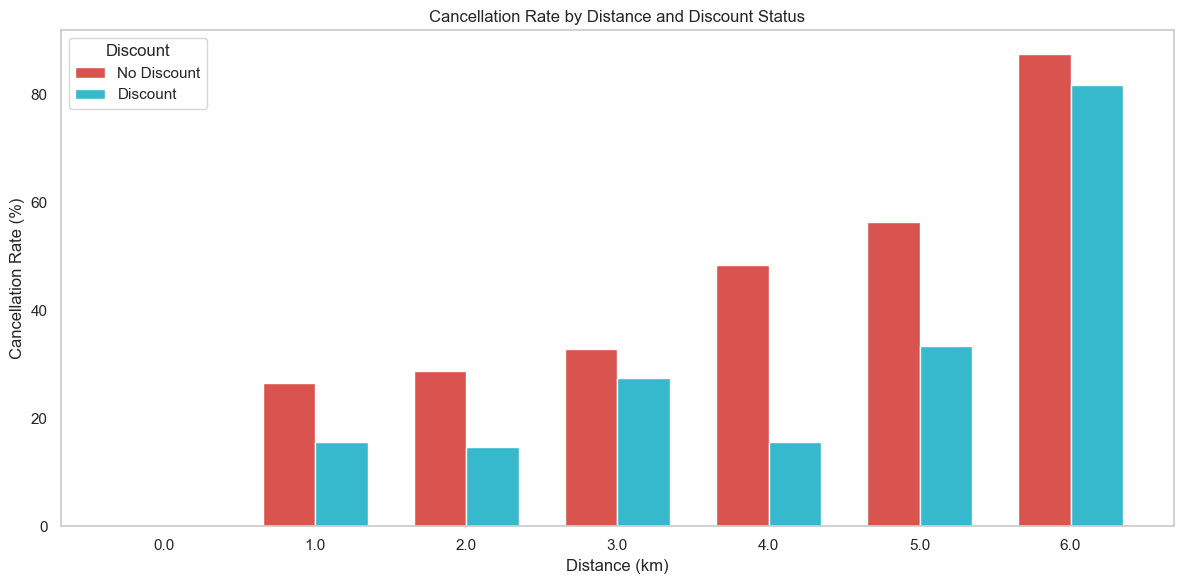

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('restaurant_orders_final.csv')

df['distance_km_rounded'] = df['distance_km'].round()

cancel_by_dist_disc = df.groupby(['distance_km_rounded', 'discount'])['order_cancelled'].value_counts(normalize=True).unstack().fillna(0) * 100
cancel_rate = cancel_by_dist_disc['yes'] if 'yes' in cancel_by_dist_disc.columns else pd.Series([0] * len(cancel_by_dist_disc.index))

cancel_rate_unstacked = cancel_rate.unstack('discount').fillna(0)

plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(cancel_rate_unstacked.index))

plt.bar(index, cancel_rate_unstacked['no'], bar_width, label='No Discount', color='#d9534f')
plt.bar(index + bar_width, cancel_rate_unstacked['yes'], bar_width, label='Discount', color='#36b9cc')

plt.title('Cancellation Rate by Distance and Discount Status')
plt.xlabel('Distance (km)')
plt.ylabel('Cancellation Rate (%)')
plt.xticks(index + bar_width / 2, cancel_rate_unstacked.index)
plt.legend(title='Discount')
plt.grid(True, linestyle=' ', alpha=0.7)
plt.tight_layout()
plt.savefig('cancellation_by_distance_discount.png')
plt.show()

### number of orders by weekday and distance

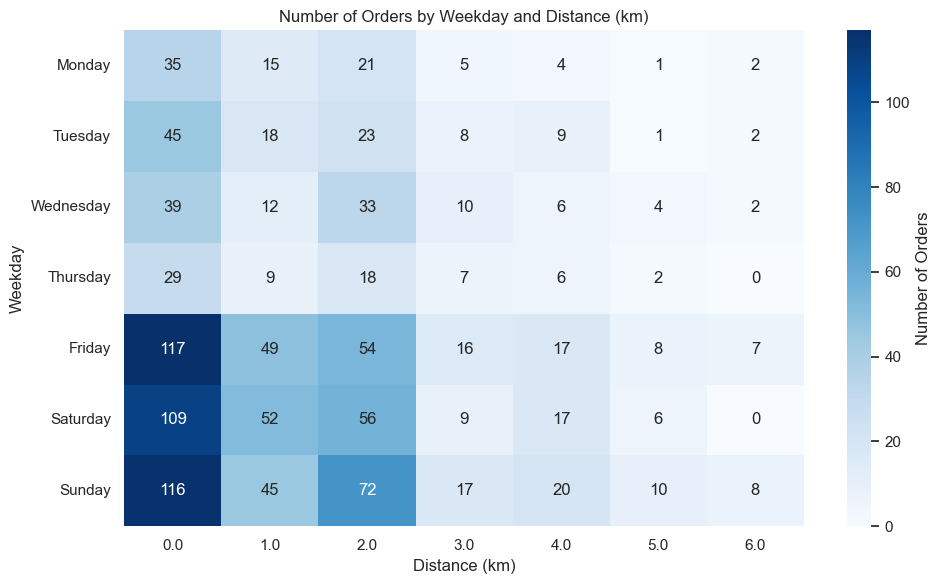

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('restaurant_orders_final.csv')
df['distance_km_rounded'] = df['distance_km'].round()

order_pivot = df.groupby(['weekday', 'distance_km_rounded'])['order_id'].nunique().unstack().fillna(0)
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
order_pivot = order_pivot.reindex(weekday_order)
plt.figure(figsize=(10, 6))
sns.heatmap(order_pivot, annot=True, fmt='.0f', cmap='Blues', cbar_kws={'label': 'Number of Orders'})
plt.title('Number of Orders by Weekday and Distance (km)')
plt.xlabel('Distance (km)')
plt.ylabel('Weekday')
plt.tight_layout()
plt.savefig('orders_by_weekday_distance_heatmap.png')
plt.show()

### Number of food items ordered by weekday and item type

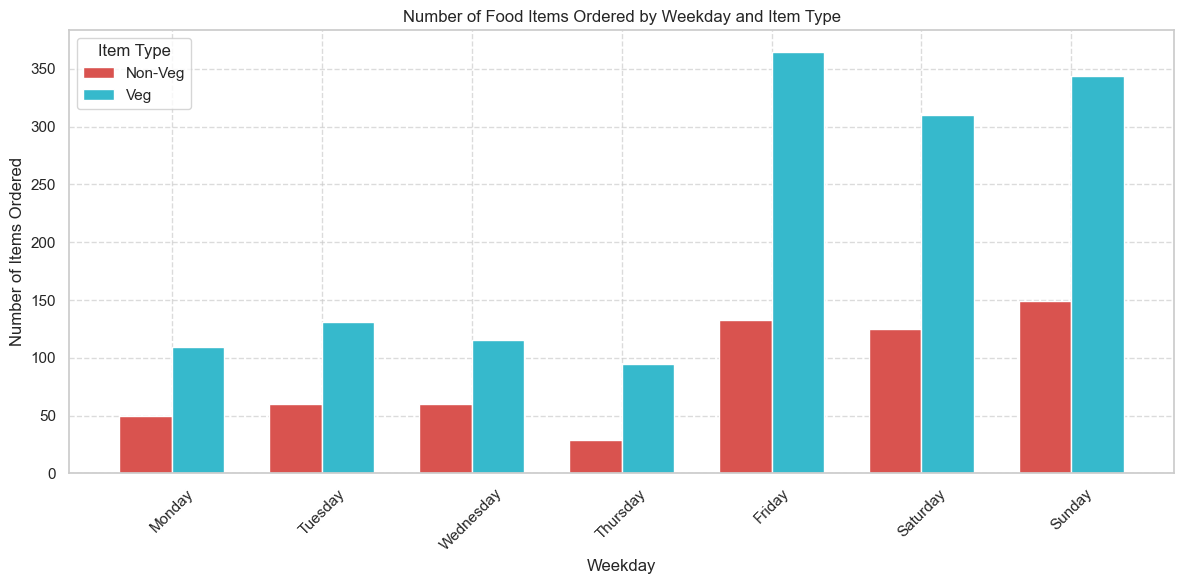

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('restaurant_orders_final.csv')

order_pivot = df.groupby(['weekday', 'item_type'])['item_qty'].sum().unstack().fillna(0)

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
order_pivot = order_pivot.reindex(weekday_order)

plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(weekday_order))

plt.bar(index, order_pivot['Non-Veg'], bar_width, label='Non-Veg', color='#d9534f')
plt.bar(index + bar_width, order_pivot['Veg'], bar_width, label='Veg', color='#36b9cc')

plt.title('Number of Food Items Ordered by Weekday and Item Type')
plt.xlabel('Weekday')
plt.ylabel('Number of Items Ordered')
plt.xticks(index + bar_width / 2, weekday_order, rotation=45)
plt.legend(title='Item Type')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('orders_by_weekday_itemtype_bar.png')
plt.show()

### Top 10 revenue generating foods

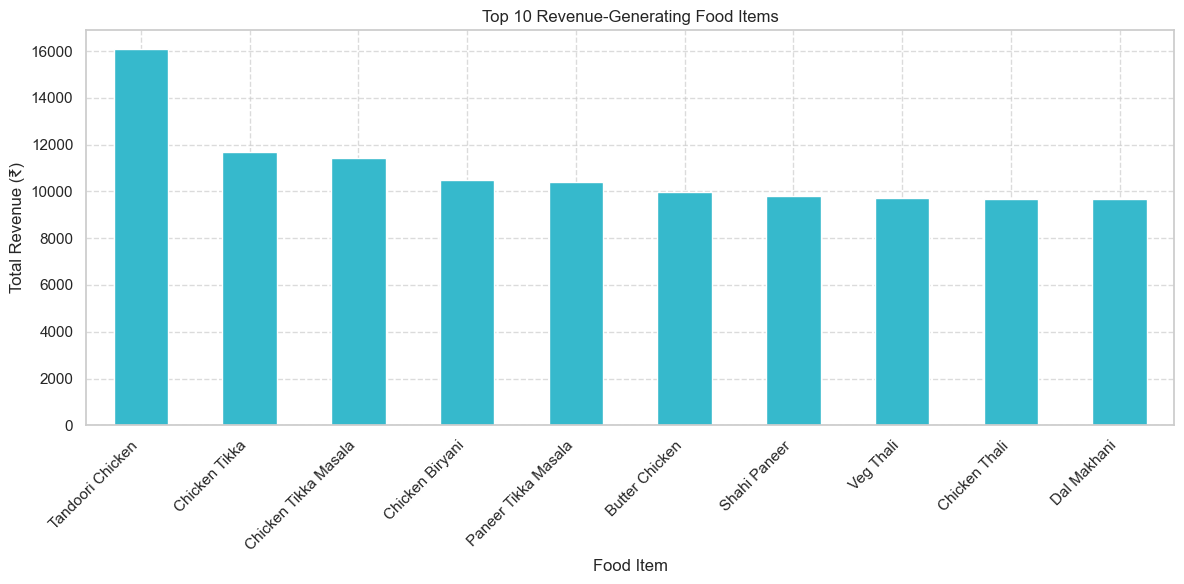

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('restaurant_orders_final.csv')

df['item_revenue'] = df['item_price'] * df['item_qty']


item_revenue = df.groupby('item_name')['item_revenue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
item_revenue.plot(kind='bar', color='#36b9cc')
plt.title('Top 10 Revenue-Generating Food Items')
plt.xlabel('Food Item')
plt.ylabel('Total Revenue (₹)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('top_10_revenue_foods_vertical.png')
plt.show()

### 10 least revenue genereating food items

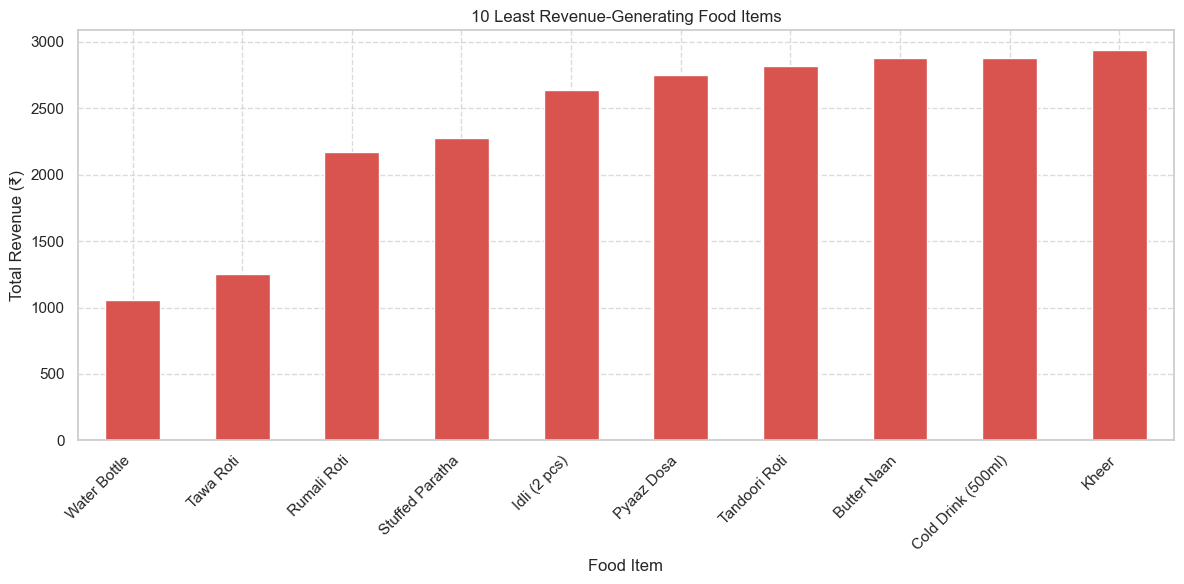

In [13]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('restaurant_orders_final.csv')


df['item_revenue'] = df['item_price'] * df['item_qty']

item_revenue = df.groupby('item_name')['item_revenue'].sum().sort_values(ascending=True).head(10)

plt.figure(figsize=(12, 6))
item_revenue.plot(kind='bar', color='#d9534f')
plt.title('10 Least Revenue-Generating Food Items')
plt.xlabel('Food Item')
plt.ylabel('Total Revenue (₹)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('least_10_revenue_foods_vertical.png')
plt.show()
